In [136]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from tqdm import trange
import numpy as np
import random
import matplotlib.pyplot as plt

In [137]:
sides = np.random.random((10000,1))*100
areas = sides**2

split_index = int(0.8 * len(sides))

sides_train, areas_train = sides[:split_index], areas[:split_index]
sides_test, areas_test = sides[split_index:], areas[split_index:]

In [138]:
model = keras.Sequential([
    Dense(units=32, activation='relu', input_shape=(1,)),
    Dense(units=32, activation='relu'),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [139]:
history = model.fit(sides_train, areas_train, validation_split=0.2, epochs=5000, batch_size=256)

Epoch 1/5000
25/25 [==============================] - 1s 5ms/step - loss: 20018462.0000 - val_loss: 18815040.0000
Epoch 2/5000
25/25 [==============================] - 0s 2ms/step - loss: 19706220.0000 - val_loss: 18523074.0000
Epoch 3/5000
25/25 [==============================] - 0s 2ms/step - loss: 19364948.0000 - val_loss: 18151048.0000
Epoch 4/5000
25/25 [==============================] - 0s 2ms/step - loss: 18912250.0000 - val_loss: 17640998.0000
Epoch 5/5000
25/25 [==============================] - 0s 2ms/step - loss: 18285468.0000 - val_loss: 16947392.0000
Epoch 6/5000
25/25 [==============================] - 0s 2ms/step - loss: 17438598.0000 - val_loss: 16003616.0000
Epoch 7/5000
25/25 [==============================] - 0s 2ms/step - loss: 16316393.0000 - val_loss: 14800476.0000
Epoch 8/5000
25/25 [==============================] - 0s 2ms/step - loss: 14914724.0000 - val_loss: 13333152.0000
Epoch 9/5000
25/25 [==============================] - 0s 2ms/step - loss: 13257869.0000 

In [140]:
model.evaluate(sides_test, areas_test, verbose=2)

63/63 - 0s - loss: 5.2135 - 57ms/epoch - 898us/step


5.213452339172363

In [141]:
# model.save(f"Squares_Model")

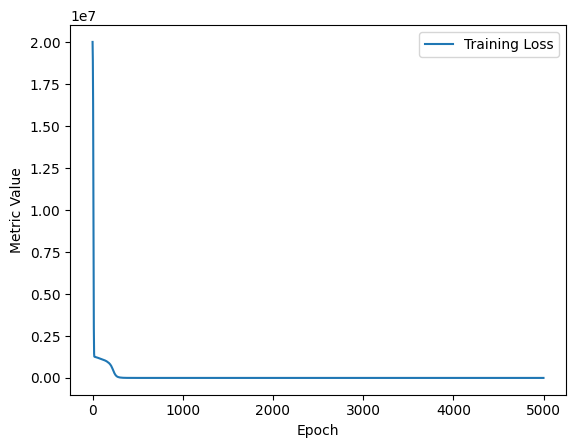

In [142]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.show()

32/32 [==============================] - 0s 708us/step


Text(0.5, 1.0, 'Original data')

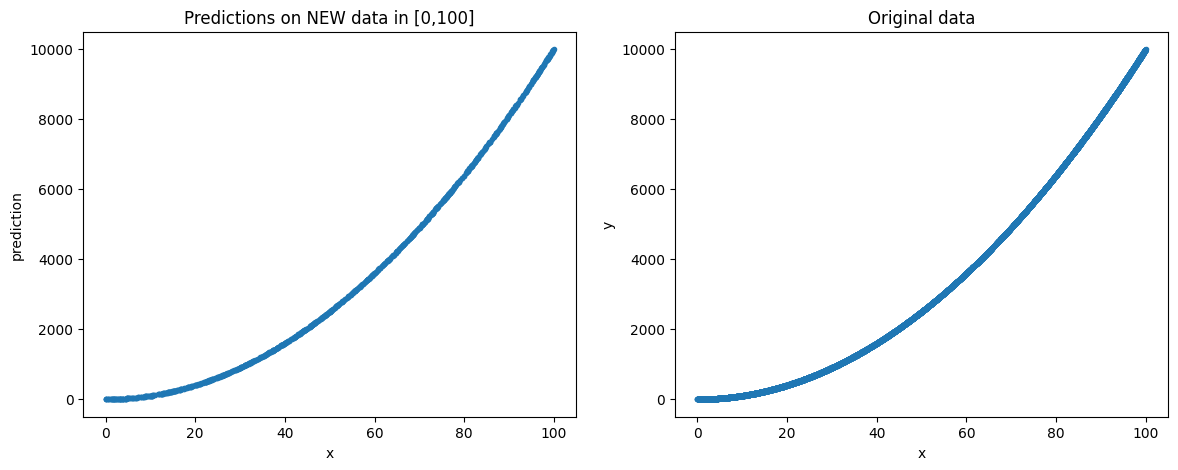

In [143]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
p = np.random.random((1000,1))*100
plt.plot(p,model.predict(p), '.')
plt.xlabel('x')
plt.ylabel('prediction')
plt.title('Predictions on NEW data in [0,100]')

plt.subplot(1,2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(sides,areas,'.')
plt.title('Original data')

In [144]:
test = [1,5,10,20,50,100,150,250,500,1000]
predicted_area = model.predict(test)
np.set_printoptions(suppress=True)
output_line = ', '.join(map(str, [elem[0] for elem in predicted_area]))
print(output_line)

1/1 [==============================] - 0s 59ms/step
1.1032479, 25.021667, 99.06994, 400.01724, 2499.1511, 9990.777, 16948.146, 30862.889, 65649.734, 135223.44
